---
---
===


# **Clase 07/10/24**

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_error

## Reto 2

# Reto 2
## Preparativos iniciales:
* Los estudiantes deben asegurarse de tener acceso a los datos y las bibliotecas
necesarias instaladas.
* Utilizarán un entorno de desarrollo adecuado (Jupyter Notebook, Google Colab, etc.)
Preparación:
* Dataset: El conjunto de datos a utilizar puede ser el mismo de la misión número 1

## Preparación:
* Dataset: El conjunto de datos a utilizar puede ser el mismo de la misión número 1

Paso 1: División del Conjunto de Datos
* Objetivo: Dividir el conjunto de datos en conjuntos de entrenamiento y prueba.
 - Instrucciones:
 - Utilizarán train_test_split de sklearn para dividir los datos.
 - Establecerán una proporción de, por ejemplo, 80% para entrenamiento y
20% para prueba.
 - Se asegurarán de incluir la variable objetivo.
 - Utilizarán validación cruzada (cross_val_score de sklearn) para
una evaluación más robusta del modelo. Explicarán cómo la validación
cruzada puede ayudar a evaluar la estabilidad y la generalización del
modelo.

In [76]:
df = pd.read_csv('/content/dataset_renovables_con_errores.csv')
df.head()

,Planta Energética,Tipo de Energía,Nivel de Democratización Energética,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Región,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
0,SolarFlow,Solar,Alto,42,1.0,100.46,48910.59373127165,Sur,1893.656170,2005,1
1,SunWave,Solar,Bajo,12,17.0,NaN,156615.16814130466,Oeste,3398.187477,2015,0
2,EcoWind,NaN,Bajo,47,NaN,52.62,25618.907447138306,Sur,1642.900952,2010,0
3,SolarFlow,Geotérmica,NaN,24,11.0,NaN,381289.3836417021,Este,2796.374954,2010,1
4,HydroFlux,Hidrógeno verde,Medio,37,5.0,404.25,196815.72283363095,Norte,2144.411388,2020,1


In [77]:
df.shape

(1000, 11)

In [78]:
df.head(3)

,Planta Energética,Tipo de Energía,Nivel de Democratización Energética,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Región,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
0,SolarFlow,Solar,Alto,42,1.0,100.46,48910.59373127165,Sur,1893.656170,2005,1
1,SunWave,Solar,Bajo,12,17.0,NaN,156615.16814130466,Oeste,3398.187477,2015,0
2,EcoWind,NaN,Bajo,47,NaN,52.62,25618.907447138306,Sur,1642.900952,2010,0


In [79]:
df.describe()

,Número de Proyectos en Marcha,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
count,810.000000,1000.000000,1000.000000,1000.00000
mean,10.262963,2620.846302,2012.175000,0.58400
std,5.447467,653.454384,5.605872,0.49314
min,1.000000,1542.598865,2005.000000,0.00000
25%,6.000000,2044.109301,2005.000000,0.00000
50%,10.000000,2620.846302,2010.000000,1.00000
75%,15.000000,3197.583303,2015.000000,1.00000
max,19.000000,3749.244782,2020.000000,1.00000


In [80]:
df.dtypes

,0
Planta Energética,object
Tipo de Energía,object
Nivel de Democratización Energética,object
Número de Comunidades Energéticas,object
Número de Proyectos en Marcha,float64
Capacidad Generada (MW),object
Reducción de CO2 (toneladas),object
Región,object
Costo de Producción ($/MW),float64
Año de Instalación,int64


In [81]:
df.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,71
Nivel de Democratización Energética,100
Número de Comunidades Energéticas,0
Número de Proyectos en Marcha,190
Capacidad Generada (MW),168
Reducción de CO2 (toneladas),57
Región,62
Costo de Producción ($/MW),0
Año de Instalación,0


In [83]:
import numpy as np

df['Capacidad Generada (MW)'] = df['Capacidad Generada (MW)'].replace(['null', ' NA', '@#', '@#$' ], np.nan)
df['Costo de Producción ($/MW)'] = df['Costo de Producción ($/MW)'].replace(['null', ' NA', '@#', '@#$' ], np.nan)
df['Rentabilidad en 10 años (Rentable=1, No Rentable=0)'] = df['Rentabilidad en 10 años (Rentable=1, No Rentable=0)'].replace(['null', ' NA', '@#', '@#$' ], np.nan)

In [84]:
df['Capacidad Generada (MW)'] = pd.to_numeric(df['Capacidad Generada (MW)'])
df['Costo de Producción ($/MW)'] = pd.to_numeric(df['Costo de Producción ($/MW)'])
df['Rentabilidad en 10 años (Rentable=1, No Rentable=0)'] = pd.to_numeric(df['Rentabilidad en 10 años (Rentable=1, No Rentable=0)'])

In [85]:
df['Capacidad Generada (MW)'].fillna(df['Capacidad Generada (MW)'].mean(), inplace=True)
df['Costo de Producción ($/MW)'].fillna(df['Costo de Producción ($/MW)'].mean(), inplace=True)
df['Rentabilidad en 10 años (Rentable=1, No Rentable=0)'].fillna(df['Rentabilidad en 10 años (Rentable=1, No Rentable=0)'].mean(), inplace=True)

<ipython-input-85-4c60574c9514>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Capacidad Generada (MW)'].fillna(df['Capacidad Generada (MW)'].mean(), inplace=True)
<ipython-input-85-4c60574c9514>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

Paso 2: Preprocesamiento de Datos
* Objetivo: Estandarizar o normalizar las características.
*  Instrucciones:
 - Usarán StandardScaler de sklearn para estandarizar los datos.
 - Aplicarán el escalador solo a los datos de entrenamiento y luego
transformarán los datos de prueba.

In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.preprocessing import StandardScaler # Import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

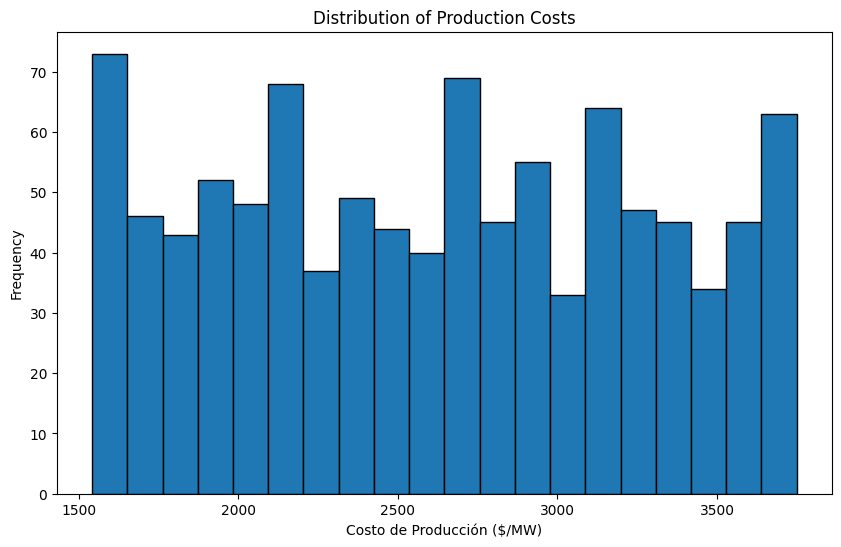

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Costo de Producción ($/MW)'], bins=20, edgecolor='black')
plt.xlabel('Costo de Producción ($/MW)')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Production Costs')

In [88]:
numerical_features = df.select_dtypes(include=['number']).columns
df_num = df[numerical_features]

# Now apply StandardScaler to the numerical features only
scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)

# If you need the 'Planta Energética' column later,
# you can concatenate it back after scaling:
df_scaled = pd.concat([pd.DataFrame(df_num_scaled, columns=numerical_features),
                        df['Planta Energética']], axis=1)

Paso 3: Implementación de Múltiples Modelos
* Objetivo: Entrenar varios modelos de Machine Learning y compararlos.
* Instrucciones:
 - Seleccionarán al menos tres modelos diferentes, por ejemplo: Regresión
Logística, Árbol de Decisión y SVM.
 - Entrenarán cada modelo usando los datos de entrenamiento.
 - Realizarán predicciones con los datos de prueba.

* Regresion lineal

In [92]:
# Preprocesamiento de datos para el modelo
x = df[['Capacidad Generada (MW)']]
y = df['Costo de Producción ($/MW)']

In [93]:
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(x, y, test_size=0.2, random_state=15)

In [94]:
modelo = LinearRegression()
modelo.fit(X_entrenamiento, y_entrenamiento)

LinearRegression()

In [95]:
# realizar predicciones
y_predicciones = modelo.predict(X_prueba)

In [96]:
#calcular del r2
r2 = modelo.score(X_prueba, y_prueba)
print("R2:", r2)

R2: -0.0042274702832378885


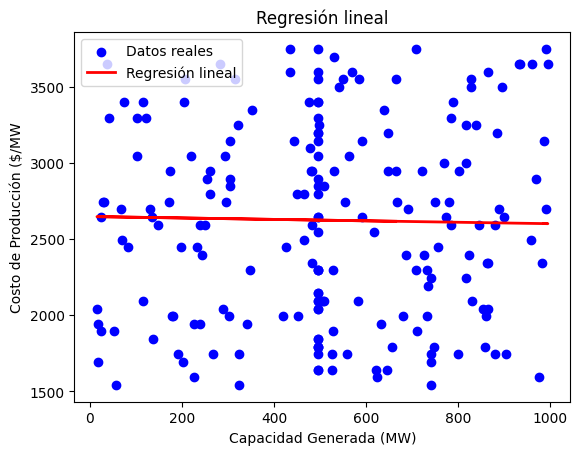

In [97]:
plt.scatter(X_prueba, y_prueba, color='blue', label='Datos reales')
plt.plot(X_prueba, y_predicciones, color='red', linewidth=2, label='Regresión lineal')
plt.xlabel('Capacidad Generada (MW)')
plt.ylabel('Costo de Producción ($/MW')
plt.title('Regresión lineal')
plt.legend()
plt.show()

In [98]:
rmse = np.sqrt(mean_squared_error(y_prueba, y_predicciones))
print("RMSE:", rmse)

RMSE: 638.5139001976747


In [99]:
mae = mean_absolute_error(y_prueba, y_predicciones)
print("MAE:", mae)

MAE: 547.0255178586965


In [100]:
n_datos_entrenamieto = len(y_entrenamiento)
n_datos_prueba = len(y_prueba)
k = x.shape[1]
print("Número de datos de prueba:", n_datos_prueba)

Número de datos de prueba: 200


In [101]:
r2_ajustado = 1 - ((1 - r2) * (n_datos_prueba - 1) / (n_datos_prueba - k - 1))
print("R2 ajustado:", r2_ajustado)

R2 ajustado: -0.009299326193759283


In [102]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

scores = metrics.r2_score(x, y)
print('R2 Score:',scores)


R2 Score: -72.931677669946


In [103]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold # import the KFold class

kfold = KFold(n_splits=3, shuffle=True, random_state=42)
cv_score = cross_val_score(modelo, x, y, cv=kfold, scoring='r2')
print(cv_score)
print(cv_score.mean())

[-0.01195184 -0.00084036 -0.00746721]
-0.006753138765078622


In [104]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

scores = metrics.mean_squared_error(y_prueba, y_predicciones)
print('R2 Score:',scores)

R2 Score: 407700.0007456461


In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def metricas(x_entrenamiento, y_entrenamiento):
  mse = mean_squared_error(y_prueba, y_predicciones)
  rmse = mean_squared_error(y_prueba, y_predicciones, squared=False)  # RMSE
  mae = mean_absolute_error(y_prueba, y_predicciones)
  r2 = r2_score(y_prueba, y_predicciones)

  return mse, rmse, mae, r2



In [109]:
print('Resultado',  metricas(y_prueba, y_predicciones))

Resultado (407700.0007456461, 638.5139001976747, 547.0255178586965, -0.0042274702832378885)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


* Gausiana

In [110]:
df['Rentabilidad > 50%'] = df['Rentabilidad en 10 años (Rentable=1, No Rentable=0)'].apply(lambda x: 1 if x > 50 else 0 )

In [111]:
x = df[['Capacidad Generada (MW)', 'Costo de Producción ($/MW)']].values # Added closing parenthesis
y = df['Rentabilidad > 50%']

In [112]:
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x, y, test_size=0.2, random_state=15)

print(np.isnan(x).sum())

0


In [113]:
from sklearn.naive_bayes import GaussianNB

# Now you can create an instance of GaussianNB
modelo = GaussianNB()
modelo.fit(x_entrenamiento, y_entrenamiento)

GaussianNB()

In [114]:
y_predicciones = modelo.predict(x_prueba)

In [115]:
from sklearn.metrics import accuracy_score
y_predicciones = modelo.predict(x_prueba)

accuracy = accuracy_score(y_prueba, y_predicciones)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [116]:
from sklearn.metrics import confusion_matrix # Import the 'confusion_matrix' function from sklearn.metrics
y_predicciones = modelo.predict(x_prueba)

matrix_confusion = confusion_matrix(y_prueba, y_predicciones)
print("Matriz de Confusión:")
print(matrix_confusion)

Matriz de Confusión:
[[200]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


<Axes: >

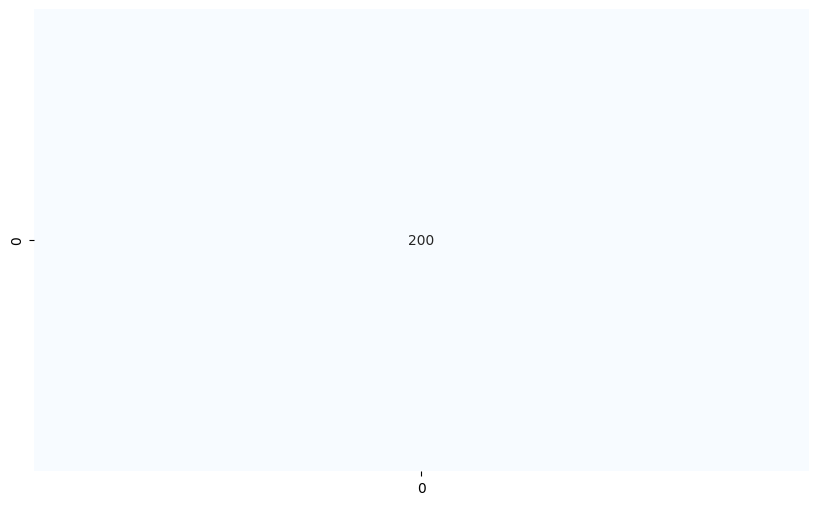

In [118]:
plt.figure(figsize=(10, 6))
sns.heatmap(matrix_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)

In [119]:
accuracy = accuracy_score(y_prueba, y_predicciones)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def metricas(x_entrenamiento, y_entrenamiento):
  matriz_de_confusion = confusion_matrix(x_entrenamiento, y_entrenamiento)
  accuracy = accuracy_score(x_entrenamiento, y_entrenamiento)
  precision = precision_score(x_entrenamiento, y_entrenamiento)
  recall = recall_score(x_entrenamiento, y_entrenamiento)
  f1 = f1_score(x_entrenamiento, y_entrenamiento)

  return matriz_de_confusion, accuracy, precision, recall, f1

In [121]:
print('Resultado',  metricas(y_prueba, y_predicciones))

Resultado (array([[200]]), 1.0, 0.0, 0.0, 0.0)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defi

* Tree selector

In [122]:
df['Rentabilidad > 50%'] = df['Rentabilidad en 10 años (Rentable=1, No Rentable=0)'].apply(lambda x: 1 if x > 50 else 0 )

In [123]:
x = df[['Capacidad Generada (MW)', 'Costo de Producción ($/MW)']].values # Added closing parenthesis
y = df['Rentabilidad > 50%']

In [124]:
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x, y, test_size=0.2, random_state=15)

print(np.isnan(x).sum())

0


In [125]:
from sklearn import tree

modelo = tree.DecisionTreeClassifier()
modelo.fit(x_entrenamiento, y_entrenamiento)

DecisionTreeClassifier()

In [126]:
y_predicciones = modelo.predict(x_prueba)

In [133]:
def metricas(x_entrenamiento, y_entrenamiento):
  min_len = min(len(x_entrenamiento), len(y_entrenamiento))
  x_entrenamiento = x_entrenamiento[:min_len]
  y_entrenamiento = y_entrenamiento[:min_len]

  matriz_de_confusion = confusion_matrix(x_entrenamiento, y_entrenamiento)
  accuracy = accuracy_score(x_entrenamiento, y_entrenamiento)
  precision = precision_score(x_entrenamiento, y_entrenamiento)
  recall = recall_score(x_entrenamiento, y_entrenamiento)
  f1 = f1_score(x_entrenamiento, y_entrenamiento)

  return matriz_de_confusion, accuracy, precision, recall, f1

 Interpretación de Resultados

Objetivo: Analizar y discutir los resultados obtenidos.
Instrucciones:
Interpretarán las métricas de rendimiento y discutirán posibles razones para las diferencias entre los modelos. Considerarán la importancia de las características en los modelos entrenados y cómo podrían influir en las predicciones.
Reflexionarán sobre posibles mejoras futuras y pasos adicionales que podrían tomarse.

In [134]:
print('Resultado',  metricas(y_prueba, y_predicciones))

Resultado (array([[200]]), 1.0, 0.0, 0.0, 0.0)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defi